<a href="https://colab.research.google.com/github/Fitzpatrique/g05-used-cars/blob/master/Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount your Google drive folder on Colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Import the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import pipeline, preprocessing, metrics, model_selection, ensemble, linear_model
from sklearn_pandas import DataFrameMapper

In [ ]:
%matplotlib inline

#Load the Dataset

In [ ]:
url = '/content/gdrive/My Drive/vehicles2.csv'

#Read the Dataset with Pandas

In [ ]:
new_df = pd.read_csv(url)

#Perform Exploratory Data Analysis on the Dataset

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157565 entries, 0 to 157564
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    157565 non-null  int64  
 1   price         157565 non-null  int64  
 2   year          157565 non-null  float64
 3   manufacturer  157565 non-null  int64  
 4   model         157565 non-null  int64  
 5   condition     157565 non-null  int64  
 6   cylinders     157565 non-null  int64  
 7   fuel          157565 non-null  int64  
 8   odometer      157565 non-null  float64
 9   title_status  157565 non-null  int64  
 10  transmission  157565 non-null  int64  
 11  drive         157565 non-null  int64  
 12  state         157565 non-null  int64  
 13  lat           157565 non-null  float64
 14  long          157565 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 18.0 MB


In [ ]:
new_df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,state,lat,long
0,35990,2010.0,0,0,0,0,0,32742.0,0,0,0,0,32.5900,-85.4800
1,7500,2014.0,1,1,1,1,0,93600.0,0,1,1,0,32.5475,-85.4682
2,2000,1974.0,0,2,0,1,0,190000.0,0,1,0,0,32.8616,-85.2161
3,19500,2005.0,2,3,1,0,1,116000.0,1,1,2,0,32.5475,-85.4682
4,39990,2012.0,2,4,0,0,0,9692.0,0,0,0,0,32.5900,-85.4800


In [ ]:
new_df.describe()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,state,lat,long
count,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000,147264.000000
mean,230646.380575,13690.302810,2009.858839,8.023903,1824.613483,0.814109,1.149208,0.114509,103472.925589,0.136782,0.984681,1.196980,23.957349,38.628379,-91.759555
std,129081.298235,10595.478975,7.749492,8.021843,2813.276759,0.997849,0.903582,0.474011,60585.727842,0.667041,0.374824,0.767367,14.857051,5.487391,16.932101
min,0.000000,1.000000,1913.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.091220,-159.713745
25%,122873.250000,5495.000000,2007.000000,2.000000,146.000000,0.000000,0.000000,0.000000,54981.000000,0.000000,1.000000,1.000000,9.000000,35.060000,-98.317031
50%,228696.000000,9995.000000,2011.000000,5.000000,587.000000,1.000000,1.000000,0.000000,101433.500000,0.000000,1.000000,1.000000,23.000000,39.628001,-86.100000
75%,341785.750000,19590.000000,2015.000000,11.000000,2021.000000,1.000000,2.000000,0.000000,145500.000000,0.000000,1.000000,2.000000,37.000000,42.417400,-79.954720
max,458211.000000,43210.000000,2021.000000,40.000000,13887.000000,5.000000,7.000000,4.000000,284321.000000,5.000000,2.000000,2.000000,50.000000,64.993698,150.898969


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


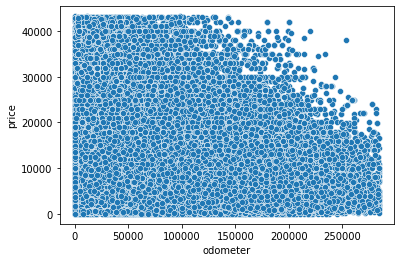

In [ ]:
sns.scatterplot(new_df['odometer'], new_df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


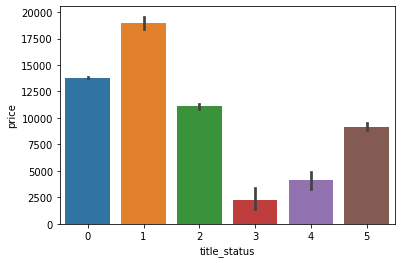

In [ ]:
sns.barplot(new_df['title_status'], new_df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


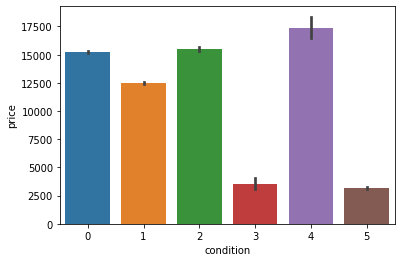

In [ ]:
sns.barplot(new_df['condition'], new_df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


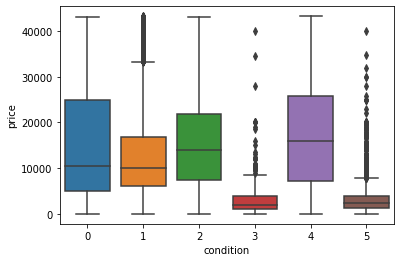

In [ ]:
sns.boxplot(new_df['condition'], new_df['price'])

#Using the IQR method to remove outliers

In [ ]:
# since price value can't be 0, remove the rows with price of 0
new_df = new_df[new_df['price']>0]

In [ ]:
# removing outliers from the price column using IQR
Q1 = new_df['price'].quantile(0.25)
Q3 = new_df['price'].quantile(0.75)
 
IQR = Q3 - Q1
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-17135.0 43225.0


In [ ]:
outliers = new_df[(new_df.price < lower_bound) | (new_df.price > upper_bound)]

In [ ]:
# new dataframe with price outliers dropped
new_df = new_df.drop(outliers.index)

In [ ]:
# removing outliers from the odometer column using IQR
Q1 = new_df['odometer'].quantile(0.25)
Q3 = new_df['odometer'].quantile(0.75)
 
IQR = Q3 - Q1
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-81952.5 284371.5


In [ ]:
outliers = new_df[(new_df.odometer < lower_bound) | (new_df.odometer > upper_bound)]

In [ ]:
new_df = new_df.drop(outliers.index)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147264 entries, 0 to 157564
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    147264 non-null  int64  
 1   price         147264 non-null  int64  
 2   year          147264 non-null  float64
 3   manufacturer  147264 non-null  int64  
 4   model         147264 non-null  int64  
 5   condition     147264 non-null  int64  
 6   cylinders     147264 non-null  int64  
 7   fuel          147264 non-null  int64  
 8   odometer      147264 non-null  float64
 9   title_status  147264 non-null  int64  
 10  transmission  147264 non-null  int64  
 11  drive         147264 non-null  int64  
 12  state         147264 non-null  int64  
 13  lat           147264 non-null  float64
 14  long          147264 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 18.0 MB


#Import SciKit Learn to Perform Train Test Split and Standardize the dataset

In [ ]:
X = [ 'year', 'odometer', 'lat', 'long', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'state']

In [ ]:
y = ['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df[X], new_df[y], test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Develop and Evaluate Various Models Using the Scikit Learn Machine Learning Algorithms

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
 
random.fit(X_train, y_train)
random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([28159.45,  5233.43,  8171.67, ...,  6198.98, 34239.63, 14984.19])

In [ ]:
print("Training set score: {:.2f}".format(random.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.91


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
 
ridge.fit(X_train, y_train)
ridge.predict(X_test)

array([[16776.62549456],
       [ 1013.22643727],
       [13092.12191619],
       ...,
       [ 7668.93973932],
       [29718.8769948 ],
       [21012.47801229]])

In [ ]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.48
Test set score: 0.48


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train, y_train)
lasso.predict(X_test)

array([16777.42761677,  1016.67296734, 13091.16998935, ...,
        7667.2914138 , 29709.85404142, 21013.57942756])

In [ ]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.48
Test set score: 0.48


#Using TensorFlow Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:

# creating a model for predicting deep learning model
model  = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(1,13)),
                tf.keras.layers.Dense(8, activation = 'relu'),
                tf.keras.layers.Dense(1, activation = 'relu')
])
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
41234/41234 [==============================] - 39s 948us/step - loss: 195296592.0000 - mean_squared_error: 195296592.0000 - val_loss: 72335744.0000 - val_mean_squared_error: 72335744.0000
Epoch 2/100
41234/41234 [==============================] - 39s 938us/step - loss: 58204724.0000 - mean_squared_error: 58204724.0000 - val_loss: 53544276.0000 - val_mean_squared_error: 53544276.0000
Epoch 3/100
41234/41234 [==============================] - 39s 951us/step - loss: 53496704.0000 - mean_squared_error: 53496704.0000 - val_loss: 52284112.0000 - val_mean_squared_error: 52284112.0000
Epoch 4/100
41234/41234 [==============================] - 40s 964us/step - loss: 52366176.0000 - mean_squared_error: 52366176.0000 - val_loss: 51208532.0000 - val_mean_squared_error: 51208532.0000
Epoch 5/100
41234/41234 [==============================] - 40s 967us/step - loss: 51138832.0000 - mean_squared_error: 51138832.0000 - val_loss: 50033964.0000 - val_mean_squared_error: 50033964.0000
Epoch 6/

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
 
pred_train = model.predict(X_train)
print("Mean Absolute Error: ", np.sqrt(mean_squared_error(y_train,pred_train)))
 
pred = model.predict(X_test)
print("Mean Absolute Error: ", np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error:  5547.425775164725
Mean Absolute Error:  5552.195305172272


In [31]:
print("R2 score : %.2f" % r2_score(y_test,pred))

R2 score : 0.73


#Save Model

In [ ]:
import joblib
 
filename = 'random_model.sav'
 
joblib.dump(random, filename)

['random_model.sav']

In [ ]:
model = joblib.load('random_model.sav')

In [ ]:
model.score(X_test, y_test)

0.8689679114797011